In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

import sys
sys.path.append("../../..")
sys.path.append("../..")
sys.path.append("..")
sys.path.append(".")
from helpers.labellines import *
import engine
import engine.magic_moment_method.vehicle_params as vehicles

686it [00:13, 49.09it/s]


Sweep completed in 14 seconds


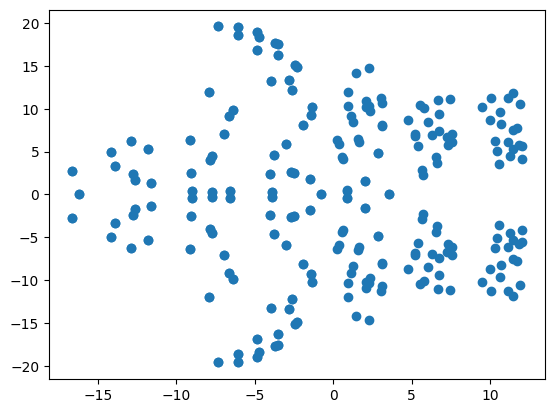

In [30]:
easy_driver = engine.Racecar(vehicles.EasyDriver())

sweep_range = {"body_slip": (-10 * np.pi / 180, 10 *np.pi / 180),
        "steered_angle" : (-18 * np.pi / 180, 18 * np.pi / 180),
        "velocity" : (2.5, 30),
        "torque_request": (-1, 1),
        "is_left_diff_bias": (True, False)}
mesh_size = 7

easy_driver.regenerate_GGV(sweep_range, mesh_size)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection="2d")
#ax.scatter(easy_driver.ggv["vehicle_accelerations_NTB_0"], easy_driver.ggv["vehicle_accelerations_NTB_1"], easy_driver.ggv["s_dot"])
plt.scatter(easy_driver.temp["vehicle_accelerations_NTB_0"], easy_driver.temp["vehicle_accelerations_NTB_1"]) #, easy_driver.temp["s_dot"])
plt.show()

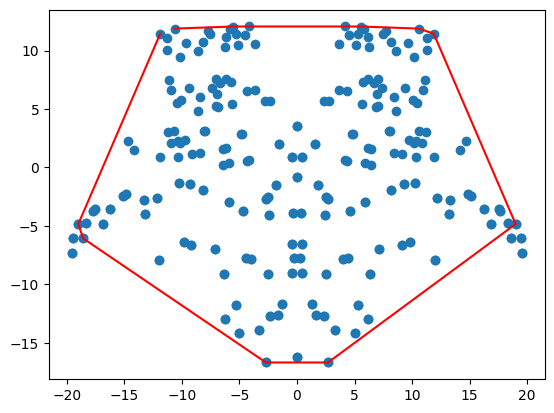

In [41]:
filt_df = easy_driver.ggv

hull_df = pd.DataFrame()
for vel in filt_df["s_dot"].unique():
    vel_df = filt_df[filt_df["s_dot"] == vel].reset_index()
    accel_df = vel_df[["vehicle_accelerations_NTB_1","vehicle_accelerations_NTB_0"]]
    try:
        hull_index = ConvexHull(accel_df).vertices
    except:
        hull_index = accel_df.index
    hull_df = pd.concat([hull_df, vel_df.loc[hull_index]], axis = 0)
plt.scatter(easy_driver.temp["vehicle_accelerations_NTB_1"], easy_driver.temp["vehicle_accelerations_NTB_0"]) #, easy_driver.temp["s_dot"])
plt.plot(hull_df["vehicle_accelerations_NTB_1"], hull_df["vehicle_accelerations_NTB_0"], c='r')